<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Evaluacion2/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Evaluación 2***

**José Agustín Parada Peralta. 219209388.**

**Departamento de Física.**

**Universidad de Sonora.**

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d 

Se presenta la ecuación diferencial del *oscilador armónico amortiguado forzado con una fuerza de tipo sinuidal*.

$$ \frac{d^2x}{dt^2}+2\zeta \omega_n\frac{dx}{dt}+\omega_n^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Donde:

$\omega _n = \sqrt{\frac{k}{m}}$  es la frecuencia angular del oscilador de masa $m$ y constante de resorte $k$.

$\zeta = \frac{c}{2\sqrt{mk}} $  es la tasa de amortiguamiento, donde $c$ es un coeficiente de viscosidad.

El lado derecho de la igualdad en la ecuación es un término de forzamiento sinuidal de amplitud $F_0$.

El movimiento del oscilador puede ser desrito mediante el valor de $\zeta$:

* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 

# Problema 1:

Resolver numéricamente para el caso del oscilador amortiguado sin forzamiento, lo que corresponde a $\zeta \neq 0$; $F_0 = 0$.

Suponer que $m = 1$, $k = 9$, $x(0) < 0$, $x'(0) = 0$.

Producir gráficas similares para los distintos valores de $\zeta$, como se muestra:

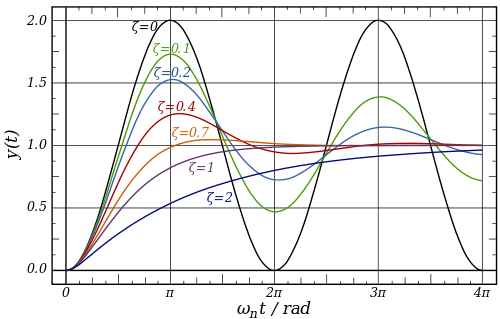

Entonces, tenemos la ecuación diferencial a resolver:

$$ \frac{d^2x}{dt^2}+2\zeta \omega_n\frac{dx}{dt}+\omega_n^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Proponemos el cambio de variable: $v=\dfrac{dx}{dt}$

De esta manera, sustituyendo en la ecuación original:

$$ \frac{dv}{dt}+2\zeta \omega _n v +\omega_n ^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Dado que, en este caso $F_0 = 0$, aplicamos este hecho, despejamos $v'$ y obtenemos:

$$ \frac{dv}{dt} = -2\zeta \omega _n v - \omega _n^2x $$

Anidando el sistema de ecuaciones en forma vectorial conseguimos expresarlo de la forma:

$$ \frac{d}{dt} \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} v \\ -2\zeta \omega _n v - \omega _n^2x \end{pmatrix} $$

Ahora, procedemos a resolver el sistema de ecuaciones diferenciales mediante la función *odeint* de SciPy.


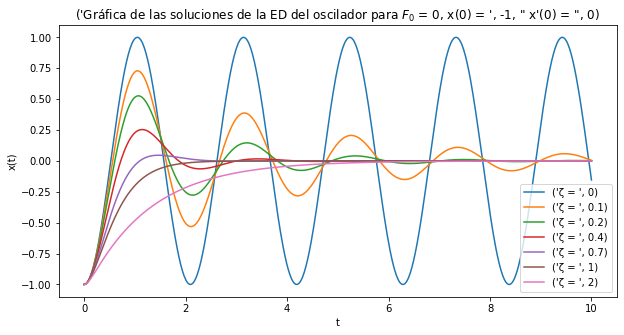

In [58]:
# Definimos la función derivada
def dxdt1(y, t, zeta, w):
  x, v = y
  r = [v, -2*zeta*w*v-w**2*x]
  return r

# Tenemos los datos:
m=1
k=9
w=np.sqrt(k/m)

# Definimos los valores de ζ
z=[0, 0.1, 0.2, 0.4, 0.7, 1, 2]

# Definimos los puntos de tiempo
t=np.linspace(0,10,600)

# Condiciones iniciales
x0=-1
xprima0=0
y0=[x0,xprima0]

# Resolvemos la ecuación diferencial y graficamos para distintos valores de ζ.
plt.figure(figsize=(10,5))
for zeta in z:
  y=odeint(dxdt1,y0,t,args=(zeta,w))
  plt.plot(t,y[:,0],label=('ζ = ',zeta))
plt.title(('Gráfica de las soluciones de la ED del oscilador para $F_0$ = 0, x(0) = ',x0," x'(0) = ",xprima0))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Problema 2:

Resolver, ahora, el caso del oscilador forzado sin amortiguamiento, correspondiente a $\zeta = 0$, $F_0 = 0$.

Suponer que: $F_0 = 1$. $m = 1$, $k = 9$, $x(0) = 0$, $x'(0) = 0$.

Producir gráficas para distintas frecuencias $\omega _n = 3, 3.1, 3.3, 3.5$.

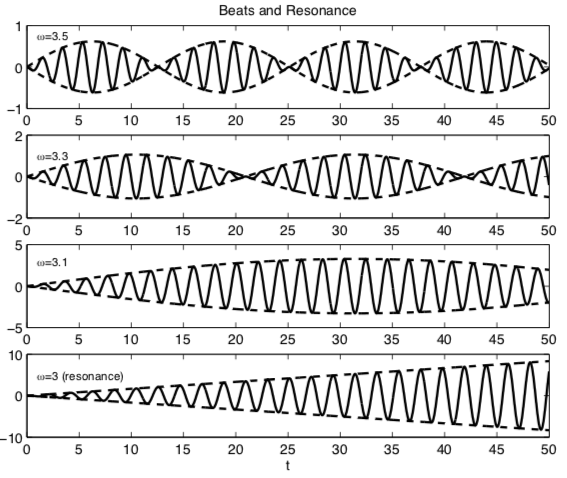

A diferencia del problema anterior, ahora tenemos distintos valores para las constantes. 

Con lo cual, tenemos la ecuación general:

$$ \frac{d^2x}{dt^2}+2\zeta \omega_n\frac{dx}{dt}+\omega_n^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Proponemos el cambio de variable: $v=\dfrac{dx}{dt}$

De esta manera, sustituyendo en la ecuación original:

$$ \frac{dv}{dt}+2\zeta \omega _n v +\omega_n ^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Sabemos que $\zeta = 0$, entonces la ecuación de $v'$ resulta:

$$ \frac{dv}{dt} = \frac{1}{m}F_0 \sin{(\omega t)} -\omega_n ^2x $$

Entonces, vectorialmente:

$$ \frac{d}{dt} \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} v \\ \frac{1}{m}F_0 \sin{(\omega t)} -\omega_n ^2x \end{pmatrix} $$


Text(0.5, 0, 't')

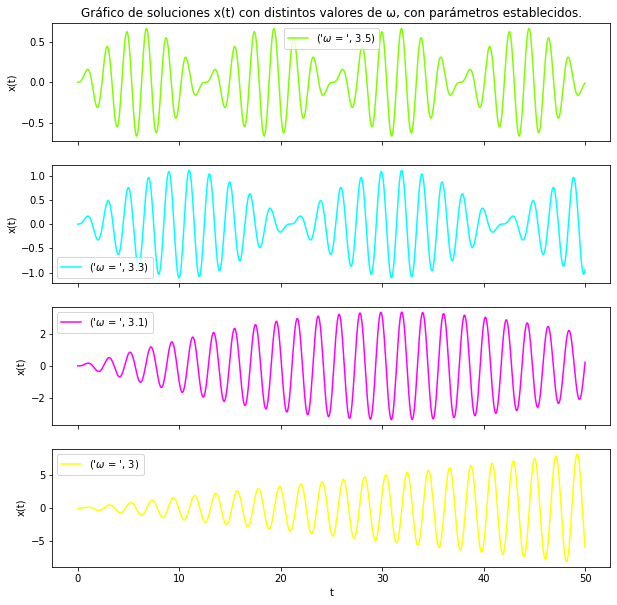

In [65]:
# Definimos la función derivada
def dxdt2(y, t, w, wn):
  x, v = y
  r = [v, np.sin(w*t)-wn**2*x]
  return r

# Tenemos los parámetros:
m=1
k=9
F0=1
wn=np.sqrt(k/m)
W=[3.5,3.3,3.1,3]
colores=['chartreuse','cyan','magenta','yellow']

# Definimos los puntos temporales:
t=np.linspace(0,50,1500)

# Condiciones iniciales
x0=0
xprima0=0
y0=[x0,xprima0]

# Resolvemos la ecuación y graficamos
fig, axes = plt.subplots(4, 1, figsize=(10,10), sharex=True)
for w, ax, c in zip(W, axes, colores):
  y=odeint(dxdt2,y0,t2,args=(w,wn))
  ax.plot(t2,y[:,0],color=c,label=('$ω$ = ',w))
  if w == 3.5:
    ax.set_title(('Gráfico de soluciones x(t) con distintos valores de ω, con parámetros establecidos.'))
  ax.set_ylabel('x(t)')
  ax.legend()

plt.xlabel('t')


# Problema 3:

Resolver, ahora, el caso completo del oscilador amortiguado forzado con una fuerza sinuidal. Esto es:

$$ \zeta \neq 0, F_0 \neq 0 $$

Suponer que $\zeta = 0.1$.

Tomar los valores del problema anterior $F_0 =1$, $m=1$, $k=9$, $x(0)=0$, $x'(0)=0$.

Producir un gráfico del espacio fase $(x,x')$, para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

Tenemos la ecuación diferencial original:

$$ \frac{d^2x}{dt^2}+2\zeta \omega_n\frac{dx}{dt}+\omega_n^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Proponemos el cambio de variable: $v=\dfrac{dx}{dt}$

De esta manera, sustituyendo en la ecuación original:

$$ \frac{dv}{dt}+2\zeta \omega _n v +\omega_n ^2x = \frac{1}{m}F_0 \sin{(\omega t)} $$

Despejamos $v'$ y obtenemos:

$$ \frac{dv}{dt} = \frac{1}{m}F_0 \sin{(\omega t)} -2\zeta \omega _n v -\omega_n ^2x  $$

En forma vectorial, el sistema de ecuaciones se ve:

$$ \frac{d}{dt}\begin{pmatrix} x \\ v  \end{pmatrix} = \begin{pmatrix} v \\ \frac{1}{m}F_0 \sin{(\omega t)} -2\zeta \omega _n v -\omega_n ^2x \end{pmatrix} $$

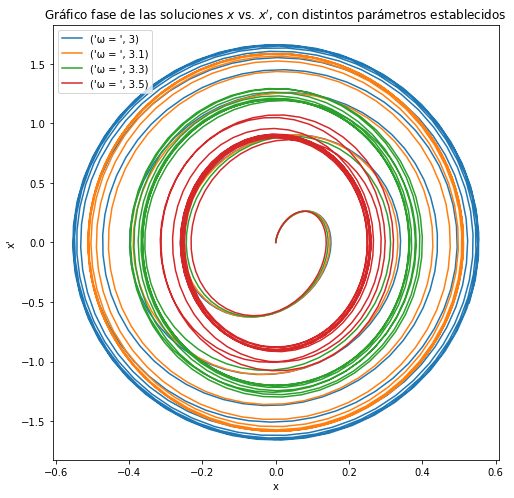

In [57]:
# Definimos la función derivada
def dxdt3(y, t, m, F0, w, zeta, wn):
  x, v = y
  r = [v, (1/m)*F0*np.sin(w*t)-2*zeta*wn*v - wn**2*x]
  return r

# Definimos los parámetros a utilizar y valores iniciales:
m = 1
k = 9
wn = np.sqrt(k/m)
F0 = 1
zeta = 0.1
W = [3,3.1,3.3,3.5]
x0=0
xprima0=0
y0=[x0,xprima0]

t=np.linspace(0,20,500)

# Resolvemos la ecuación y graficamos las soluciones para distintos valores de w:
plt.figure(figsize=(8,8))
for w in W:
  y=odeint(dxdt3,y0,t,args=(m,F0,w,zeta,wn))
  plt.plot(y[:,0],y[:,1], label=('ω = ',w))
plt.title(("Gráfico fase de las soluciones $x$ vs. $x'$, con distintos parámetros establecidos"))
plt.xlabel('x')
plt.ylabel("x'")
plt.legend()
plt.show()